## Analysis with AQ Score
- AQ Score X OPI (pearson correlation and plot)
- AQ Score X TWI (pearson correlation and plot)
- AQ Score X HL (pearson correlation and plot)
- AQ Score X LDL (pearson correlation and plot)
- TWI - group difference according to matching autism questionnaire criteria for autism evaluation and not (t test and plot)
- OPI -  group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- LDL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- HL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)

In [62]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit

pd.options.mode.chained_assignment = None  # Stop seeing warnings

df = pd.read_pickle("data/df")
df_sigmoid = pd.read_pickle("data/df_sigmoid")

In [2]:
df.describe()

,Age,AQ_TOTAL,AQ_Attention_Detail,AQ_Attention_Switch,AQ_Communication,AQ_Imagination,AQ_Social,AQ_1,AQ_2,AQ_3,...,HL_250,HL_500,HL_1000,HL_2000,HL_4000,HL_8000,Avg_LDL,Avg_HL_L,Avg_HL_R,Avg_HL
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,17.612903,4.741935,1.419355,1.064516,1.290323,0.709677,1.000000,0.709677,0.387097,0.709677,...,6.785714,6.785714,5.714286,4.285714,3.035714,1.964286,74.360119,6.041667,6.041667,4.761905
std,1.145351,1.692488,0.922829,0.727346,0.692510,0.642575,0.516398,0.461414,0.495138,0.461414,...,6.833237,6.696362,7.033555,4.852316,5.666550,8.315457,23.729681,5.627429,4.733782,5.085975
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-10.000000,36.666667,-2.500000,-0.833333,-2.500000
25%,17.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,-1.250000,54.166667,0.000000,1.666667,0.000000
50%,18.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,78.333333,5.833333,5.833333,4.583333
75%,18.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,6.250000,5.000000,5.000000,94.166667,10.833333,8.541667,8.333333
max,21.000000,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,25.000000,25.000000,25.000000,15.000000,15.000000,20.000000,106.666667,17.500000,18.333333,18.333333


<Axes: xlabel='AQ_TOTAL', ylabel='Count'>

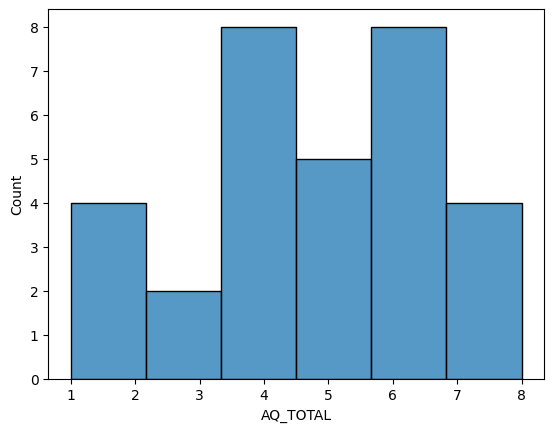

In [3]:
sns.histplot(data=df, x="AQ_TOTAL")

In [4]:
pg.cronbach_alpha(
    df[
        [
            "AQ_1",
            "AQ_2",
            "AQ_3",
            "AQ_4",
            "AQ_5",
            "AQ_6",
            "AQ_7",
            "AQ_8",
            "AQ_9",
            "AQ_10",
        ]
    ]
)

(0.18950567623134001, array([-0.314,  0.555]))

In [5]:
df.groupby("AQ_MC").describe()["AQ_TOTAL"]

,count,mean,std,min,25%,50%,75%,max
AQ_MC,,,,,,,,
False,19.0,3.684211,1.204281,1.0,3.0,4.0,4.5,5.0
True,12.0,6.416667,0.668558,6.0,6.0,6.0,7.0,8.0


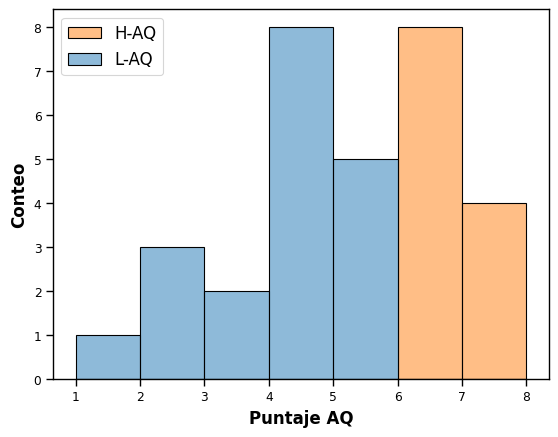

In [6]:
sns.set_context("paper")
ax = sns.histplot(
    data=df, x="AQ_TOTAL", hue="AQ_MC", stat="count", kde=False, binwidth=1
)
# ax.set_ylabel("Count", fontdict={"weight": "bold", "size": 12})
# ax.set_xlabel("AQ Score", fontdict={"weight": "bold", "size": 12})
ax.set_ylabel("Conteo", fontdict={"weight": "bold", "size": 12})
ax.set_xlabel("Puntaje AQ", fontdict={"weight": "bold", "size": 12})
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels=["H-AQ", "L-AQ"], fontsize=12)
plt.savefig("drafts/FIG1.pdf", bbox_inches="tight", format="pdf")

In [7]:
df.groupby(["AQ_MC", "Sex"]).count()

Código de participante  Group  Age  EL  Occupation  \
AQ_MC Sex                                                             
False Femenino                       15     15   15  15          15   
      Masculino                       4      4    4   4           4   
True  Femenino                       10     10   10  10          10   
      Masculino                       2      2    2   2           2   

                 Scholarship  Neurological_D  Conditions  Prob_Vision  \
AQ_MC Sex                                                               
False Femenino            10              15          15           15   
      Masculino            0               4           4            4   
True  Femenino             4              10          10           10   
      Masculino            1               2           2            2   

                 Prob_Aud  ...  HL_250  HL_500  HL_1000  HL_2000  HL_4000  \
AQ_MC Sex                  ...                                              
False Femenino         15  ...      14      14       14       14       14   
      Masculino         4  ...       4       4        4        4        4   
True  Femenino         10  ...       9       9        9        9        9   
      Masculino         2  ...       1       1        1        1        1   

                 HL_8000  Avg_LDL  Avg_HL_L  Avg_HL_R  Avg_HL  
AQ_MC Sex                                                      
False Femenino        14       14        14        14      14  
      Masculino        4        4         4         4       4  
True  Femenino         9        9         9         9       9  
      Masculino        1        1         1         1       1  

[4 rows x 62 columns]

### AQ X OPI, AQ X TWI

In [8]:
pg.pairwise_corr(data=df, columns=[["AQ_TOTAL"], ["TWI", "OPI"]], method="pearson")

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,AQ_TOTAL,TWI,pearson,two-sided,25,-0.027536,"[-0.42, 0.37]",0.896048,0.25,0.051373
1,AQ_TOTAL,OPI,pearson,two-sided,27,-0.353347,"[-0.65, 0.03]",0.070607,1.13,0.451311


In [9]:
aq_dfi_corr = pg.pairwise_corr(
    data=df,
    columns=[
        [
            "AQ_Attention_Detail",
            "AQ_Attention_Switch",
            "AQ_Communication",
            "AQ_Imagination",
            "AQ_Social",
        ],
        ["TWI", "OPI"],
    ],
    method="pearson",
)
sup_table_2 = aq_dfi_corr[["X", "Y", "r", "p-unc"]]
pg.print_table(sup_table_2, tablefmt="latex")

\begin{tabular}{llrr}
\hline
 X                   & Y   &      r &   p-unc \\
\hline
 AQ\_Attention\_Detail & TWI & -0.186 &   0.373 \\
 AQ\_Attention\_Detail & OPI & -0.331 &   0.092 \\
 AQ\_Attention\_Switch & TWI & -0.040 &   0.851 \\
 AQ\_Attention\_Switch & OPI &  0.075 &   0.711 \\
 AQ\_Communication    & TWI &  0.036 &   0.865 \\
 AQ\_Communication    & OPI & -0.315 &   0.110 \\
 AQ\_Imagination      & TWI &  0.083 &   0.693 \\
 AQ\_Imagination      & OPI & -0.067 &   0.740 \\
 AQ\_Social           & TWI &  0.003 &   0.989 \\
 AQ\_Social           & OPI & -0.261 &   0.189 \\
\hline
\end{tabular}



In [10]:
pg.normality(
    df[
        [
            "TWI",
            "OPI",
            "AQ_TOTAL",
            "AQ_Attention_Detail",
            "AQ_Attention_Switch",
            "AQ_Communication",
            "AQ_Imagination",
            "AQ_Social",
        ]
    ]
)

,W,pval,normal
TWI,0.949778,2.478500e-01,True
OPI,0.968364,5.592112e-01,True
AQ_TOTAL,0.953255,1.918476e-01,True
AQ_Attention_Detail,0.570934,2.323060e-08,False
AQ_Attention_Switch,0.810222,8.027116e-05,False
AQ_Communication,0.782288,2.467533e-05,False
AQ_Imagination,0.773004,1.697532e-05,False
AQ_Social,0.692164,8.923760e-07,False


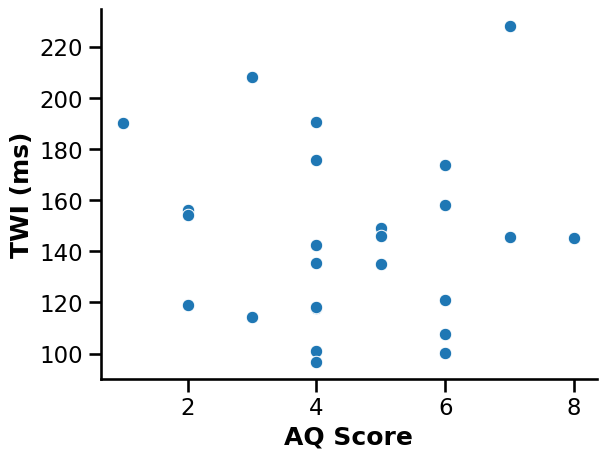

In [11]:
sns.set_context("talk")
sns.axes_style({"font.sans-serif": "Computer Modern Sans Serif"})

fig = sns.scatterplot(data=df, x="AQ_TOTAL", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})

plt.show()

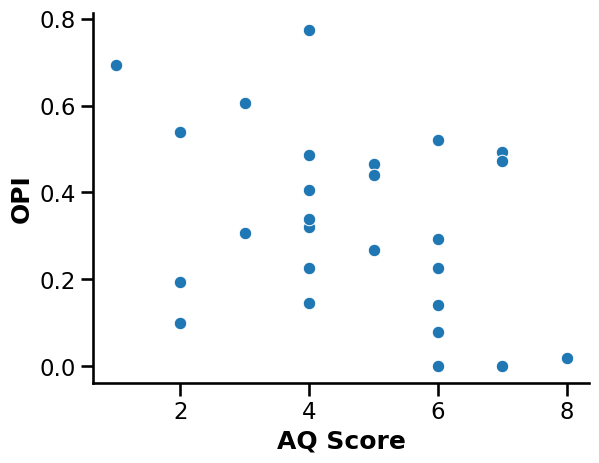

In [12]:
sns.set_context("talk")
fig = sns.scatterplot(data=df, x="AQ_TOTAL", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
plt.show()

In [13]:
## TODO Create plot with this two graphs.

### AQ X LDL

In [14]:
pg.normality(
    df[
        [
            "AQ_TOTAL",
            "Avg_LDL",
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ]
    ]
)

,W,pval,normal
AQ_TOTAL,0.953255,0.191848,True
Avg_LDL,0.916361,0.028223,False
LDL_250,0.942842,0.130548,True
LDL_500,0.915781,0.027316,False
LDL_1000,0.981076,0.875357,True
LDL_2000,0.949140,0.188501,True
LDL_4000,0.929399,0.059536,True
LDL_8000,0.867767,0.002182,False


In [15]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["AQ_TOTAL"],
        [
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ],
    ],
    method="kendall",
    padjust="bonferroni",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,AQ_TOTAL,LDL_250,kendall,two-sided,28,0.371193,"[-0.0, 0.65]",0.011742,0.070455,bonferroni,0.507514
1,AQ_TOTAL,LDL_500,kendall,two-sided,28,0.455384,"[0.1, 0.71]",0.001910,0.011458,bonferroni,0.703631
2,AQ_TOTAL,LDL_1000,kendall,two-sided,28,0.505184,"[0.16, 0.74]",0.000487,0.002923,bonferroni,0.806020
3,AQ_TOTAL,LDL_2000,kendall,two-sided,28,0.472542,"[0.12, 0.72]",0.001035,0.006212,bonferroni,0.740792
4,AQ_TOTAL,LDL_4000,kendall,two-sided,28,0.453182,"[0.1, 0.71]",0.001596,0.009573,bonferroni,0.698746
5,AQ_TOTAL,LDL_8000,kendall,two-sided,28,0.439605,"[0.08, 0.7]",0.002598,0.015587,bonferroni,0.668132


In [16]:
aq_ldl_corr = pg.pairwise_corr(
    data=df,
    columns=[
        [
            "AQ_Attention_Detail",
            "AQ_Attention_Switch",
            "AQ_Communication",
            "AQ_Imagination",
            "AQ_Social",
        ],
        [
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ],
    ],
    method="kendall",
    # padjust="bonferroni",
)

sup_table_3 = aq_ldl_corr[["X", "Y", "r", "p-unc"]]
pg.print_table(sup_table_3, tablefmt="latex")

\begin{tabular}{llrr}
\hline
 X                   & Y        &      r &   p-unc \\
\hline
 AQ\_Attention\_Detail & LDL\_250  &  0.244 &   0.142 \\
 AQ\_Attention\_Detail & LDL\_500  &  0.247 &   0.136 \\
 AQ\_Attention\_Detail & LDL\_1000 &  0.187 &   0.251 \\
 AQ\_Attention\_Detail & LDL\_2000 &  0.161 &   0.320 \\
 AQ\_Attention\_Detail & LDL\_4000 &  0.214 &   0.185 \\
 AQ\_Attention\_Detail & LDL\_8000 &  0.249 &   0.131 \\
 AQ\_Attention\_Switch & LDL\_250  &  0.185 &   0.241 \\
 AQ\_Attention\_Switch & LDL\_500  &  0.261 &   0.096 \\
 AQ\_Attention\_Switch & LDL\_1000 &  0.306 &   0.048 \\
 AQ\_Attention\_Switch & LDL\_2000 &  0.314 &   0.042 \\
 AQ\_Attention\_Switch & LDL\_4000 &  0.260 &   0.090 \\
 AQ\_Attention\_Switch & LDL\_8000 &  0.239 &   0.126 \\
 AQ\_Communication    & LDL\_250  &  0.329 &   0.039 \\
 AQ\_Communication    & LDL\_500  &  0.323 &   0.042 \\
 AQ\_Communication    & LDL\_1000 &  0.364 &   0.020 \\
 AQ\_Communication    & LDL\_2000 &  0.378 &   0.015 \\
 A

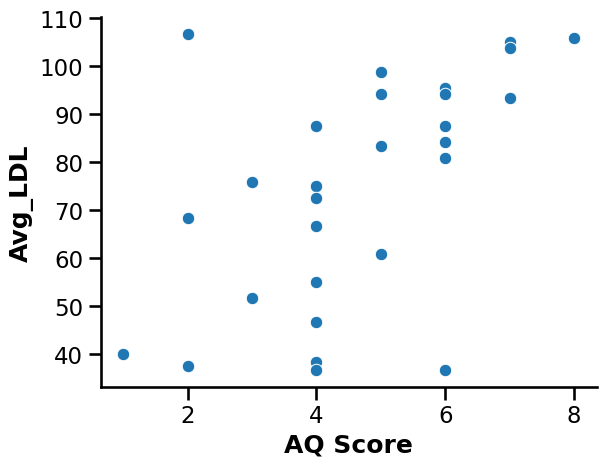

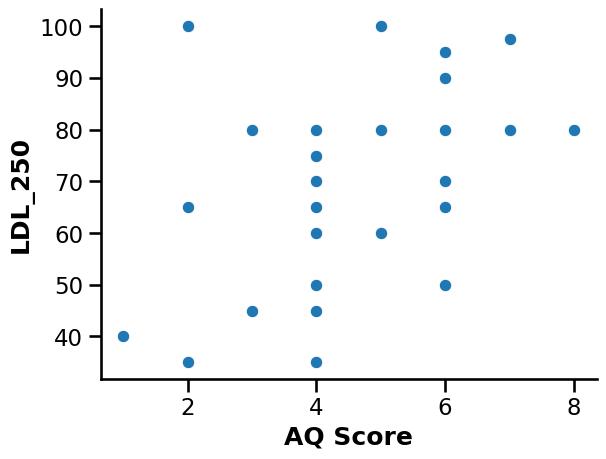

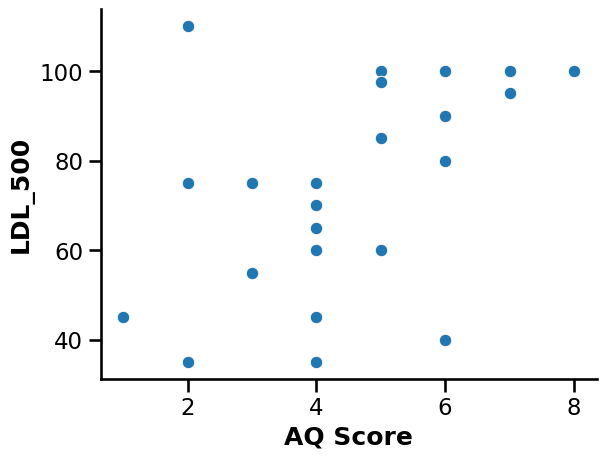

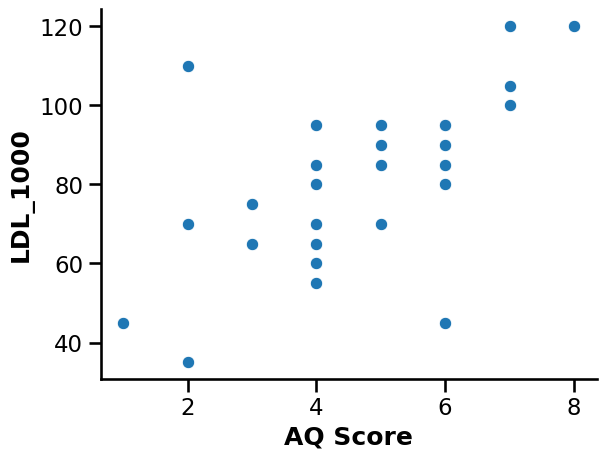

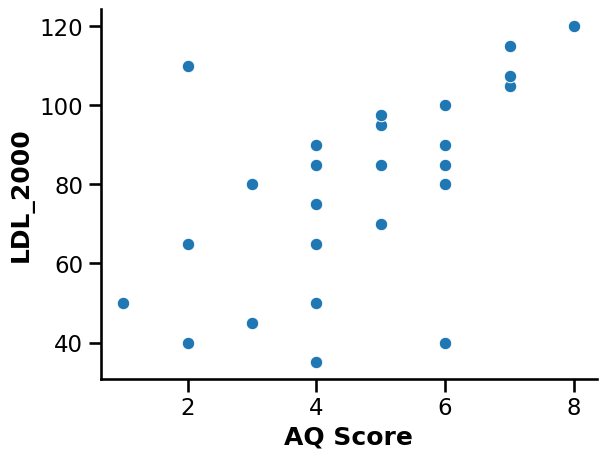

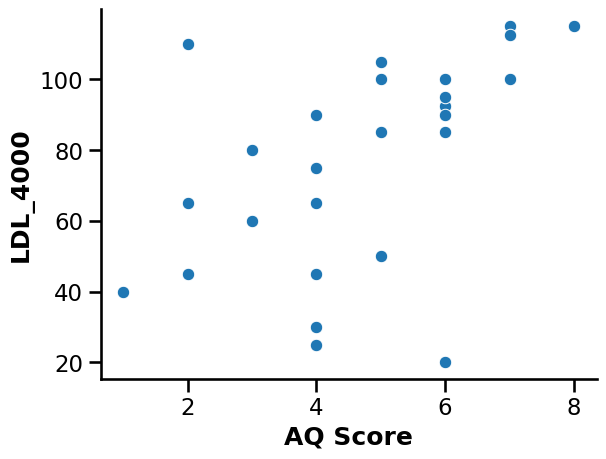

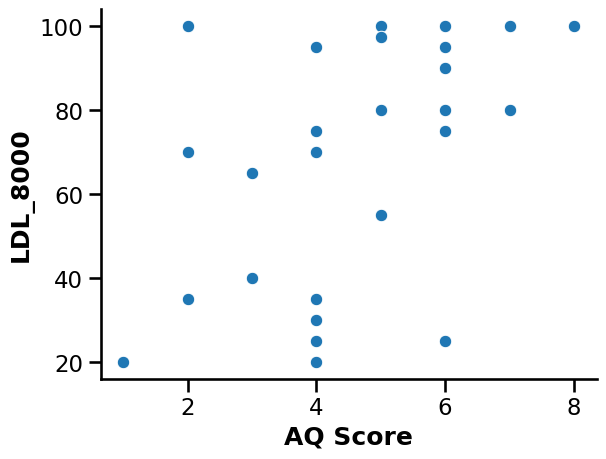

In [17]:
freqs = [
    "Avg_LDL",
    "LDL_250",
    "LDL_500",
    "LDL_1000",
    "LDL_2000",
    "LDL_4000",
    "LDL_8000",
]

for frequency in freqs:
    sns.set_context("talk")
    fig = sns.scatterplot(data=df, x="AQ_TOTAL", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
    plt.show()

In [18]:
## TODO Create plot with all these graphs

In [19]:
pg.pairwise_corr(
    data=df,
    columns=[
        [
            "HL_250",
            "HL_500",
            "HL_1000",
            "HL_2000",
            "HL_4000",
            "HL_8000",
        ],
        [
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ],
    ],
    method="kendall",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,HL_250,LDL_250,kendall,two-sided,28,0.253961,"[-0.13, 0.57]",0.093390,0.260639
1,HL_250,LDL_500,kendall,two-sided,28,0.236361,"[-0.15, 0.56]",0.116895,0.230906
2,HL_250,LDL_1000,kendall,two-sided,28,0.213182,"[-0.17, 0.54]",0.151996,0.195312
3,HL_250,LDL_2000,kendall,two-sided,28,0.276153,"[-0.11, 0.59]",0.062014,0.301325
4,HL_250,LDL_4000,kendall,two-sided,28,0.244467,"[-0.14, 0.57]",0.097403,0.244314
5,HL_250,LDL_8000,kendall,two-sided,28,0.237463,"[-0.15, 0.56]",0.113338,0.232699
6,HL_500,LDL_250,kendall,two-sided,28,0.237221,"[-0.15, 0.56]",0.115103,0.232305
7,HL_500,LDL_500,kendall,two-sided,28,0.182823,"[-0.2, 0.52]",0.222718,0.154930
8,HL_500,LDL_1000,kendall,two-sided,28,0.209611,"[-0.18, 0.54]",0.156747,0.190194
9,HL_500,LDL_2000,kendall,two-sided,28,0.250408,"[-0.14, 0.57]",0.088885,0.254453


### AQ X HL

In [20]:
pg.normality(
    df[
        [
            "AQ_TOTAL",
            "Avg_HL",
            "HL_250",
            "HL_500",
            "HL_1000",
            "HL_2000",
            "HL_4000",
            "HL_8000",
        ]
    ]
)

,W,pval,normal
AQ_TOTAL,0.953255,0.191848,True
Avg_HL,0.947457,0.170939,True
HL_250,0.910245,0.020042,False
HL_500,0.917299,0.029758,False
HL_1000,0.912872,0.023201,False
HL_2000,0.913338,0.023814,False
HL_4000,0.898670,0.010650,False
HL_8000,0.927767,0.054167,True


In [21]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["AQ_TOTAL"],
        ["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
    ],
    method="kendall",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,AQ_TOTAL,HL_250,kendall,two-sided,28,0.212343,"[-0.17, 0.54]",0.169952,0.194101
1,AQ_TOTAL,HL_500,kendall,two-sided,28,0.221635,"[-0.17, 0.55]",0.149813,0.207816
2,AQ_TOTAL,HL_1000,kendall,two-sided,28,0.159810,"[-0.23, 0.5]",0.297341,0.129004
3,AQ_TOTAL,HL_2000,kendall,two-sided,28,0.196844,"[-0.19, 0.53]",0.209503,0.172699
4,AQ_TOTAL,HL_4000,kendall,two-sided,28,0.160627,"[-0.23, 0.5]",0.300557,0.129856
5,AQ_TOTAL,HL_8000,kendall,two-sided,28,-0.107269,"[-0.46, 0.28]",0.480293,0.084327


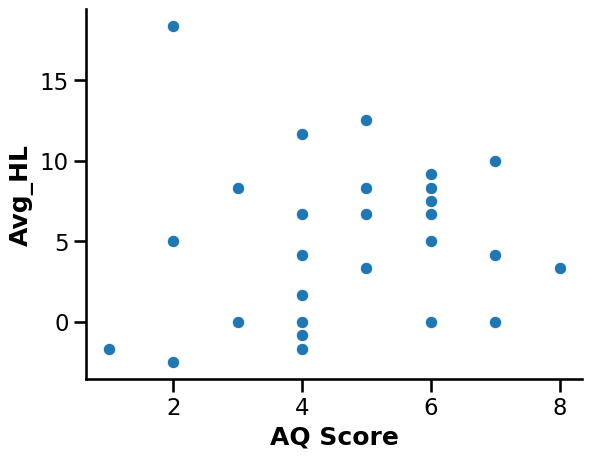

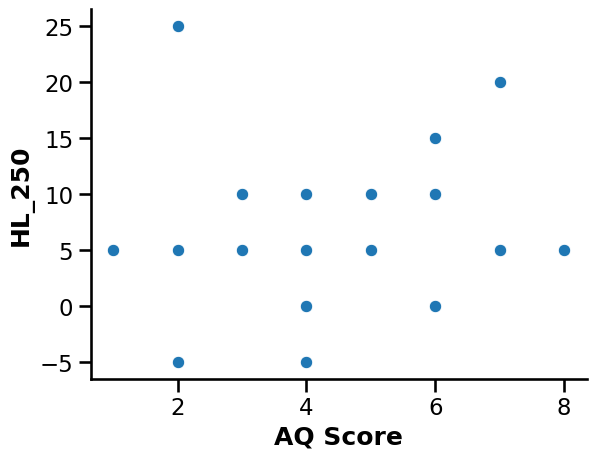

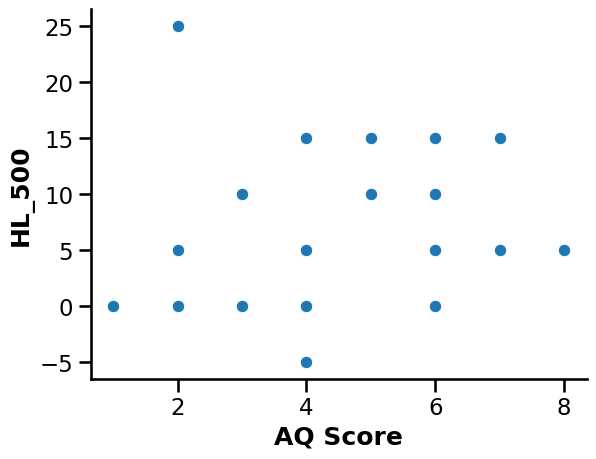

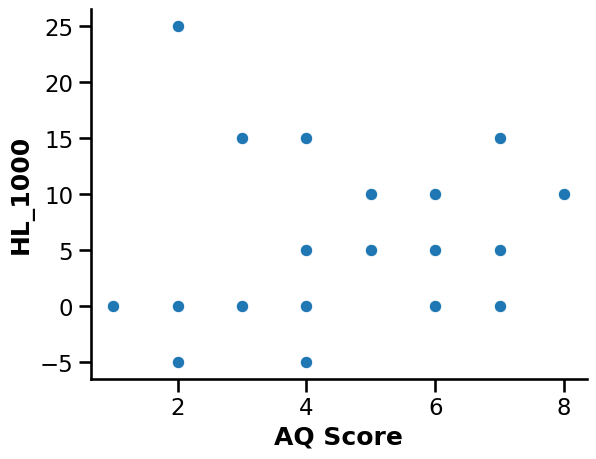

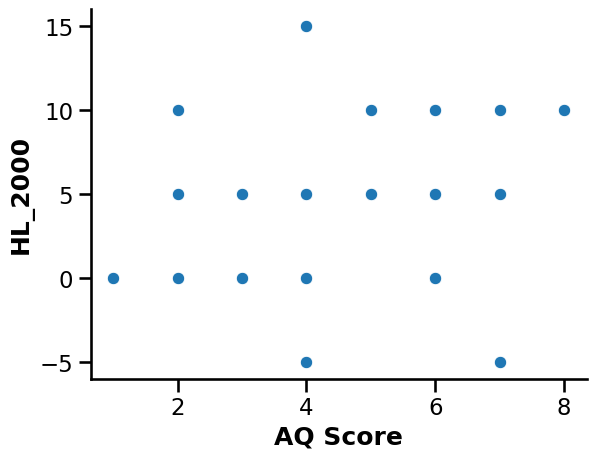

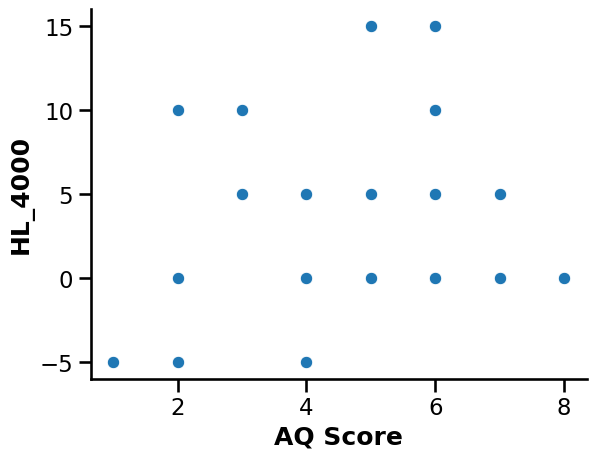

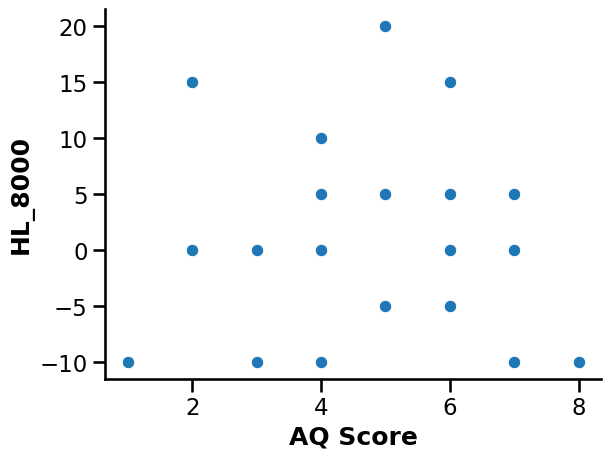

In [22]:
freqs = ["Avg_HL", "HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"]

for frequency in freqs:
    sns.set_context("talk")
    fig = sns.scatterplot(data=df, x="AQ_TOTAL", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
    plt.show()

### Group differences (autism criteria vs no autism criteria) and TWI and OPI

In [23]:
pg.normality(data=df, dv="OPI", group="AQ_MC")

,W,pval,normal
AQ_MC,,,
False,0.962240,0.673904,True
True,0.869541,0.098740,True


In [24]:
pg.pairwise_tests(
    data=df,
    dv="OPI",
    between="AQ_MC",
    effsize="cohen",
    correction=True,
    parametric=True,
    alternative="two-sided",
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,1.898098,18.028885,two-sided,0.073812,1.316,0.769382


/tmp/ipykernel_26128/1083867864.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


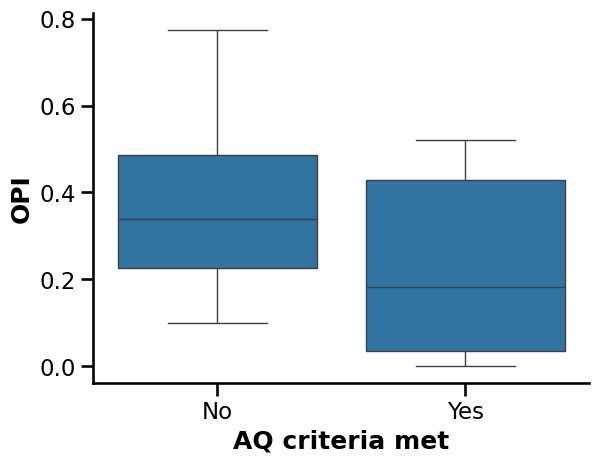

In [25]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

plt.show()

In [26]:
pg.normality(data=df, dv="TWI", group="AQ_MC")

,W,pval,normal
AQ_MC,,,
False,0.95298,0.505323,True
True,0.92825,0.500283,True


In [27]:
pg.pairwise_tests(
    data=df,
    dv="TWI",
    between="AQ_MC",
    effsize="cohen",
    correction=True,
    parametric=True,
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-0.201996,11.28922,two-sided,0.843514,0.392,-0.094524


/tmp/ipykernel_26128/3320831477.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


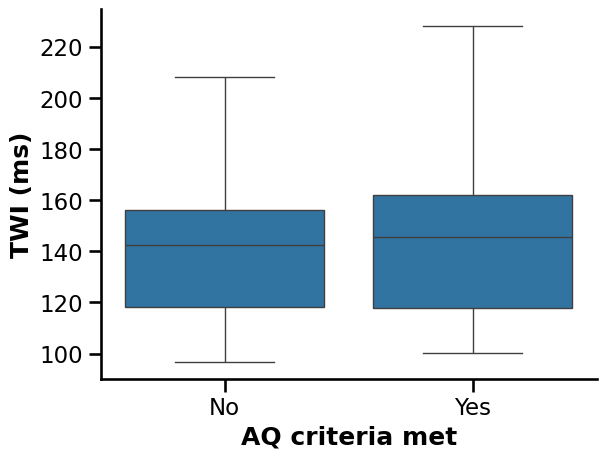

In [28]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})
fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

plt.show()

### Group differences (autism criteria vs no autism criteria) and HL mean and LDL mean per frequency

#### LDL

In [29]:
df_pointplots = df[
    [
        "Código de participante",
        "AQ_MC",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
    ]
]

# Split groups
df_pointplots_AQ = df_pointplots[df_pointplots["AQ_MC"] == True]
df_pointplots_control = df_pointplots[df_pointplots["AQ_MC"] == False]

# Melt for HA
df_pointplots_AQ = pd.melt(
    df_pointplots_AQ,
    id_vars=["Código de participante"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_AQ["Group"] = "H-AQ"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_control["Group"] = "L-AQ"

# Concat
df_pointplots_ldl = pd.concat([df_pointplots_AQ, df_pointplots_control])

# Rename columns
df_pointplots_ldl.dropna(inplace=True)
df_pointplots_ldl.columns = ["ID", "Freq", "Db", "Group"]

df_pointplots_ldl

,ID,Freq,Db,Group
0,AC02,LDL_250,80.0,H-AQ
1,AC05,LDL_250,80.0,H-AQ
2,AC06,LDL_250,80.0,H-AQ
3,AC10,LDL_250,90.0,H-AQ
4,AC11,LDL_250,65.0,H-AQ
...,...,...,...,...
109,GC001,LDL_8000,20.0,L-AQ
110,GC006,LDL_8000,35.0,L-AQ
111,GC007,LDL_8000,75.0,L-AQ
112,GC008,LDL_8000,20.0,L-AQ


In [30]:
df_pointplots_ldl

,ID,Freq,Db,Group
0,AC02,LDL_250,80.0,H-AQ
1,AC05,LDL_250,80.0,H-AQ
2,AC06,LDL_250,80.0,H-AQ
3,AC10,LDL_250,90.0,H-AQ
4,AC11,LDL_250,65.0,H-AQ
...,...,...,...,...
109,GC001,LDL_8000,20.0,L-AQ
110,GC006,LDL_8000,35.0,L-AQ
111,GC007,LDL_8000,75.0,L-AQ
112,GC008,LDL_8000,20.0,L-AQ


/tmp/ipykernel_26128/2078210927.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


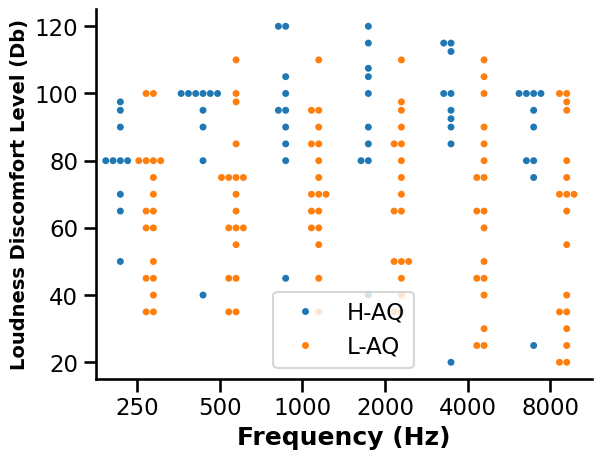

In [31]:
import starbars

fig = sns.swarmplot(
    data=df_pointplots_ldl,
    x="Freq",
    y="Db",
    hue="Group",
    #    linestyles=["-", "--"],
    #    errorbar="se",
    dodge=True,
)

fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)

fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold", "size": 14}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

In [32]:
pg.normality(data=df_pointplots_ldl, dv="Db", group="Freq")

,W,pval,normal
Freq,,,
LDL_250,0.942842,0.130548,True
LDL_500,0.915781,0.027316,False
LDL_1000,0.981076,0.875357,True
LDL_2000,0.949140,0.188501,True
LDL_4000,0.929399,0.059536,True
LDL_8000,0.867767,0.002182,False


In [33]:
pg.mixed_anova(
    data=df_pointplots_ldl, dv="Db", between="Group", within="Freq", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,19103.215112,1,26,19103.215112,6.887037,0.014343,NaN,0.209415,NaN,NaN,NaN,NaN
1,Freq,2622.061012,5,130,524.412202,7.085177,0.000007,0.00022,0.214150,0.651934,False,0.29467,0.006361
2,Interaction,684.061673,5,130,136.812335,1.848431,0.107858,NaN,0.066375,NaN,NaN,NaN,NaN


In [34]:
ldl_posthoc = pg.pairwise_tests(
    data=df_pointplots_ldl,
    dv="Db",
    between="Group",
    within="Freq",
    subject="ID",
    correction=True,
    effsize="cohen",
    padjust="bonferroni",
)
ldl_posthoc

,Contrast,Freq,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Freq,-,LDL_1000,LDL_2000,True,True,1.933138,27.000000,two-sided,0.063769,0.956540,bonferroni,1.014,0.149751
1,Freq,-,LDL_1000,LDL_250,True,True,4.705725,27.000000,two-sided,0.000067,0.001008,bonferroni,376.891,0.505589
2,Freq,-,LDL_1000,LDL_4000,True,True,1.980055,27.000000,two-sided,0.057973,0.869595,bonferroni,1.093,0.204422
3,Freq,-,LDL_1000,LDL_500,True,True,2.195012,27.000000,two-sided,0.036941,0.554113,bonferroni,1.564,0.186881
4,Freq,-,LDL_1000,LDL_8000,True,True,3.957672,27.000000,two-sided,0.000495,0.007424,bonferroni,62.861,0.443234
5,Freq,-,LDL_2000,LDL_250,True,True,2.815469,27.000000,two-sided,0.008986,0.134792,bonferroni,5.044,0.302897
6,Freq,-,LDL_2000,LDL_4000,True,True,0.958641,27.000000,two-sided,0.346246,1.000000,bonferroni,0.305,0.064143
7,Freq,-,LDL_2000,LDL_500,True,True,0.301656,27.000000,two-sided,0.765225,1.000000,bonferroni,0.209,0.025677
8,Freq,-,LDL_2000,LDL_8000,True,True,3.601571,27.000000,two-sided,0.001257,0.018853,bonferroni,27.595,0.285022
9,Freq,-,LDL_250,LDL_4000,True,True,-1.657073,27.000000,two-sided,0.109081,1.000000,bonferroni,0.673,-0.202255


#### HL

In [35]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["AQ_MC"] == True]
df_pointplots_control = df_pointplots[df_pointplots["AQ_MC"] == False]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_HA["Group"] = "H-AQ"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_control["Group"] = "L-AQ"

# Concat
df_pointplots_hl = pd.concat([df_pointplots_HA, df_pointplots_control])
df_pointplots_hl.columns = ["ID", "Freq", "Db", "Group"]
df_pointplots_hl.dropna(inplace=True)

df_pointplots_hl

,ID,Freq,Db,Group
0,AC02,HL_250,10.0,H-AQ
1,AC05,HL_250,5.0,H-AQ
2,AC06,HL_250,5.0,H-AQ
3,AC10,HL_250,15.0,H-AQ
4,AC11,HL_250,10.0,H-AQ
...,...,...,...,...
109,GC001,HL_8000,-10.0,L-AQ
110,GC006,HL_8000,15.0,L-AQ
111,GC007,HL_8000,0.0,L-AQ
112,GC008,HL_8000,5.0,L-AQ


/tmp/ipykernel_26128/1253760234.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


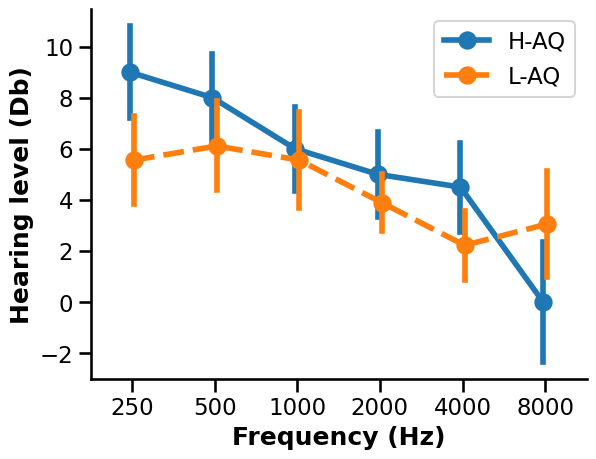

In [36]:
fig = sns.pointplot(
    data=df_pointplots_hl,
    x="Freq",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
# plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
# plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000'])
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})
fig.set_ylabel("Hearing level (Db)", fontdict={"weight": "bold"})
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)

handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

In [37]:
pg.normality(data=df_pointplots_hl, dv="Db", group="Freq")

,W,pval,normal
Freq,,,
HL_250,0.910245,0.020042,False
HL_500,0.917299,0.029758,False
HL_1000,0.912872,0.023201,False
HL_2000,0.913338,0.023814,False
HL_4000,0.898670,0.010650,False
HL_8000,0.927767,0.054167,True


In [38]:
pg.mixed_anova(
    data=df_pointplots_hl, dv="Db", between="Group", within="Freq", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,40.013228,1,26,40.013228,0.250657,0.620825,NaN,0.009549,NaN,NaN,NaN,NaN
1,Freq,563.690476,5,130,112.738095,5.188798,0.000225,0.002005,0.166367,0.654676,False,0.243521,0.001313
2,Interaction,161.772487,5,130,32.354497,1.489124,0.197706,NaN,0.054171,NaN,NaN,NaN,NaN


In [39]:
hl_posthoc = pg.pairwise_tests(
    data=df_pointplots_hl,
    dv="Db",
    between="Group",
    within="Freq",
    subject="ID",
    correction=True,
    effsize="cohen",
    padjust="bonferroni",
)

hl_posthoc

,Contrast,Freq,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Freq,-,HL_1000,HL_2000,True,True,1.161895,27.000000,two-sided,0.255446,1.000000,bonferroni,0.369,0.236433
1,Freq,-,HL_1000,HL_250,True,True,-1.294551,27.000000,two-sided,0.206438,1.000000,bonferroni,0.425,-0.154515
2,Freq,-,HL_1000,HL_4000,True,True,2.247193,27.000000,two-sided,0.033003,0.495044,bonferroni,1.713,0.419396
3,Freq,-,HL_1000,HL_500,True,True,-1.063124,27.000000,two-sided,0.297142,1.000000,bonferroni,0.335,-0.156025
4,Freq,-,HL_1000,HL_8000,True,True,2.287760,27.000000,two-sided,0.030208,0.453120,bonferroni,1.841,0.486936
5,Freq,-,HL_2000,HL_250,True,True,-2.201398,27.000000,two-sided,0.036437,0.546558,bonferroni,1.582,-0.421860
6,Freq,-,HL_2000,HL_4000,True,True,1.192079,27.000000,two-sided,0.243603,1.000000,bonferroni,0.381,0.236959
7,Freq,-,HL_2000,HL_500,True,True,-2.552889,27.000000,two-sided,0.016650,0.249753,bonferroni,3.005,-0.427534
8,Freq,-,HL_2000,HL_8000,True,True,1.494483,27.000000,two-sided,0.146646,1.000000,bonferroni,0.541,0.340996
9,Freq,-,HL_250,HL_4000,True,True,3.378773,27.000000,two-sided,0.002228,0.033415,bonferroni,16.727,0.597414


/tmp/ipykernel_26128/2484962055.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(freq_range)
/tmp/ipykernel_26128/2484962055.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(freq_range)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


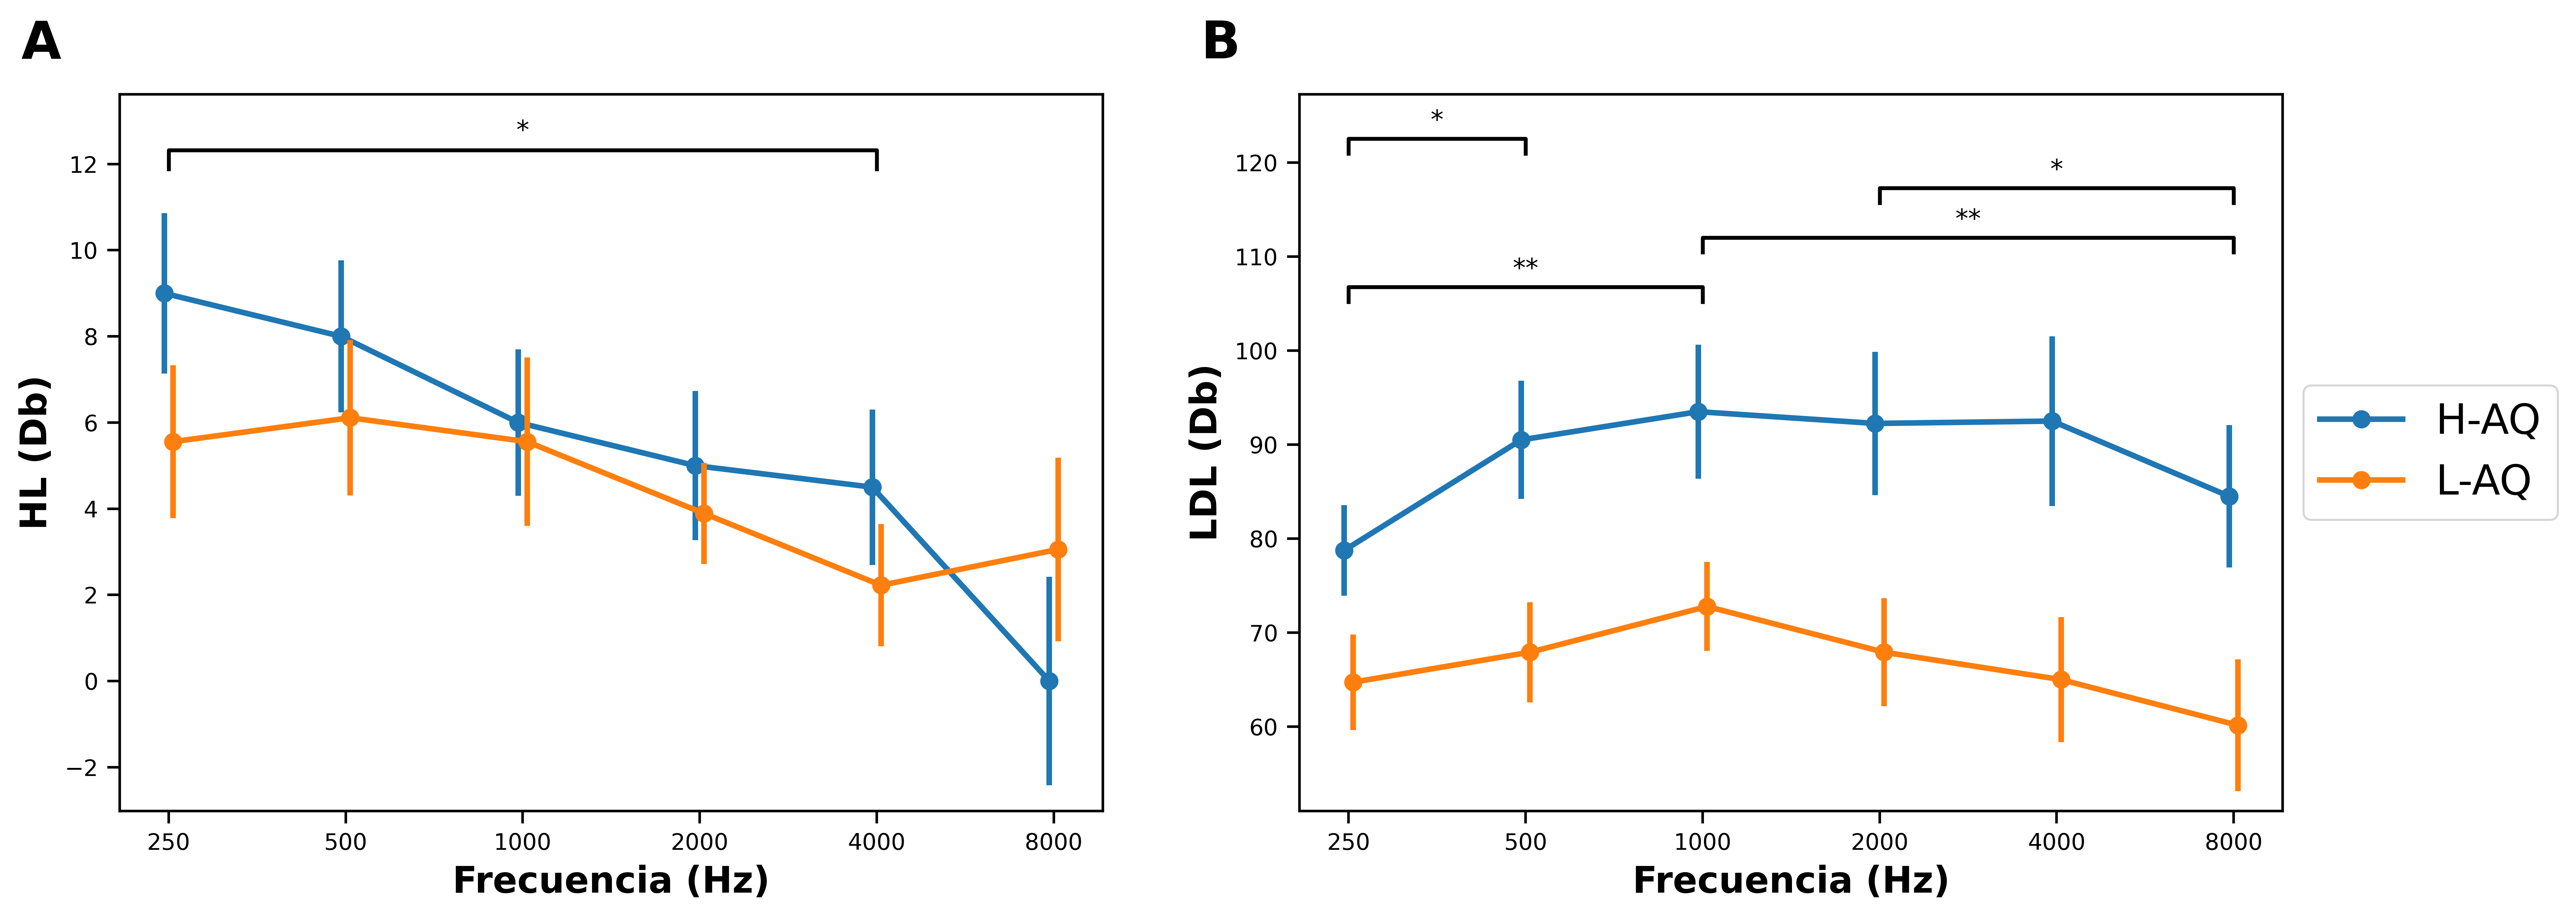

In [40]:
import matplotlib.pyplot as plt
import string
from matplotlib import rc

sns.set_context("paper")

rc("text", usetex=False)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=600)
freq_range = [250, 500, 1000, 2000, 4000, 8000]

ax1 = plt.subplot(121)

ax1 = sns.pointplot(
    data=df_pointplots_hl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=True,
    errorbar="se",
    legend=False,
)

# Draw stars
hl_pvalues = hl_posthoc[["Contrast", "Freq", "A", "B", "p-corr"]]
hl_pvalues_freq = hl_pvalues.query("Freq == '-' & Contrast == 'Freq'").drop(
    columns=["Freq", "Contrast"]
)
annotations = hl_pvalues_freq.to_dict(orient="split", index=False)["data"]
starbars.draw_annotation(annotations, ns_show=False, ax=ax1)

ax1.set_xticklabels(freq_range)
# ax1.set_ylabel(
#    "Hearing Level (Db)", fontdict={"weight": "bold", "size": 14}
# )
# ax1.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold", "size": 14})

ax1.set_ylabel("HL (Db)", fontdict={"weight": "bold", "size": 14})
ax1.set_xlabel("Frecuencia (Hz)", fontdict={"weight": "bold", "size": 14})

ax1.text(
    -0.1,
    1.05,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)

ax2 = plt.subplot(122)

ax2 = sns.pointplot(
    data=df_pointplots_ldl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=True,
    errorbar="se",
)

# Draw stars
ldl_pvalues = ldl_posthoc[["Contrast", "Freq", "A", "B", "p-corr"]]
ldl_pvalues_freq = ldl_pvalues.query("Freq == '-' & Contrast == 'Freq'").drop(
    columns=["Freq", "Contrast"]
)
annotations = ldl_pvalues_freq.to_dict(orient="split", index=False)["data"]
starbars.draw_annotation(annotations, ns_show=False, ax=ax2)

ax2.set_xticklabels(freq_range)
# ax2.set_ylabel(
#    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold", "size": 14}
# )
# ax2.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold", "size": 14})

ax2.set_ylabel("LDL (Db)", fontdict={"weight": "bold", "size": 14})
ax2.set_xlabel("Frecuencia (Hz)", fontdict={"weight": "bold", "size": 14})

ax2.text(
    -0.1,
    1.05,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

# Remove legend title
handles, labels = ax2.get_legend_handles_labels()
leg = ax2.legend(
    fontsize=16,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    handles=handles[2:],
    labels=labels[2:],
)

fig.savefig("drafts/FIG2.eps", bbox_inches="tight", format="eps")

/tmp/ipykernel_26128/1713058797.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(freq_range)
/tmp/ipykernel_26128/1713058797.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(freq_range)


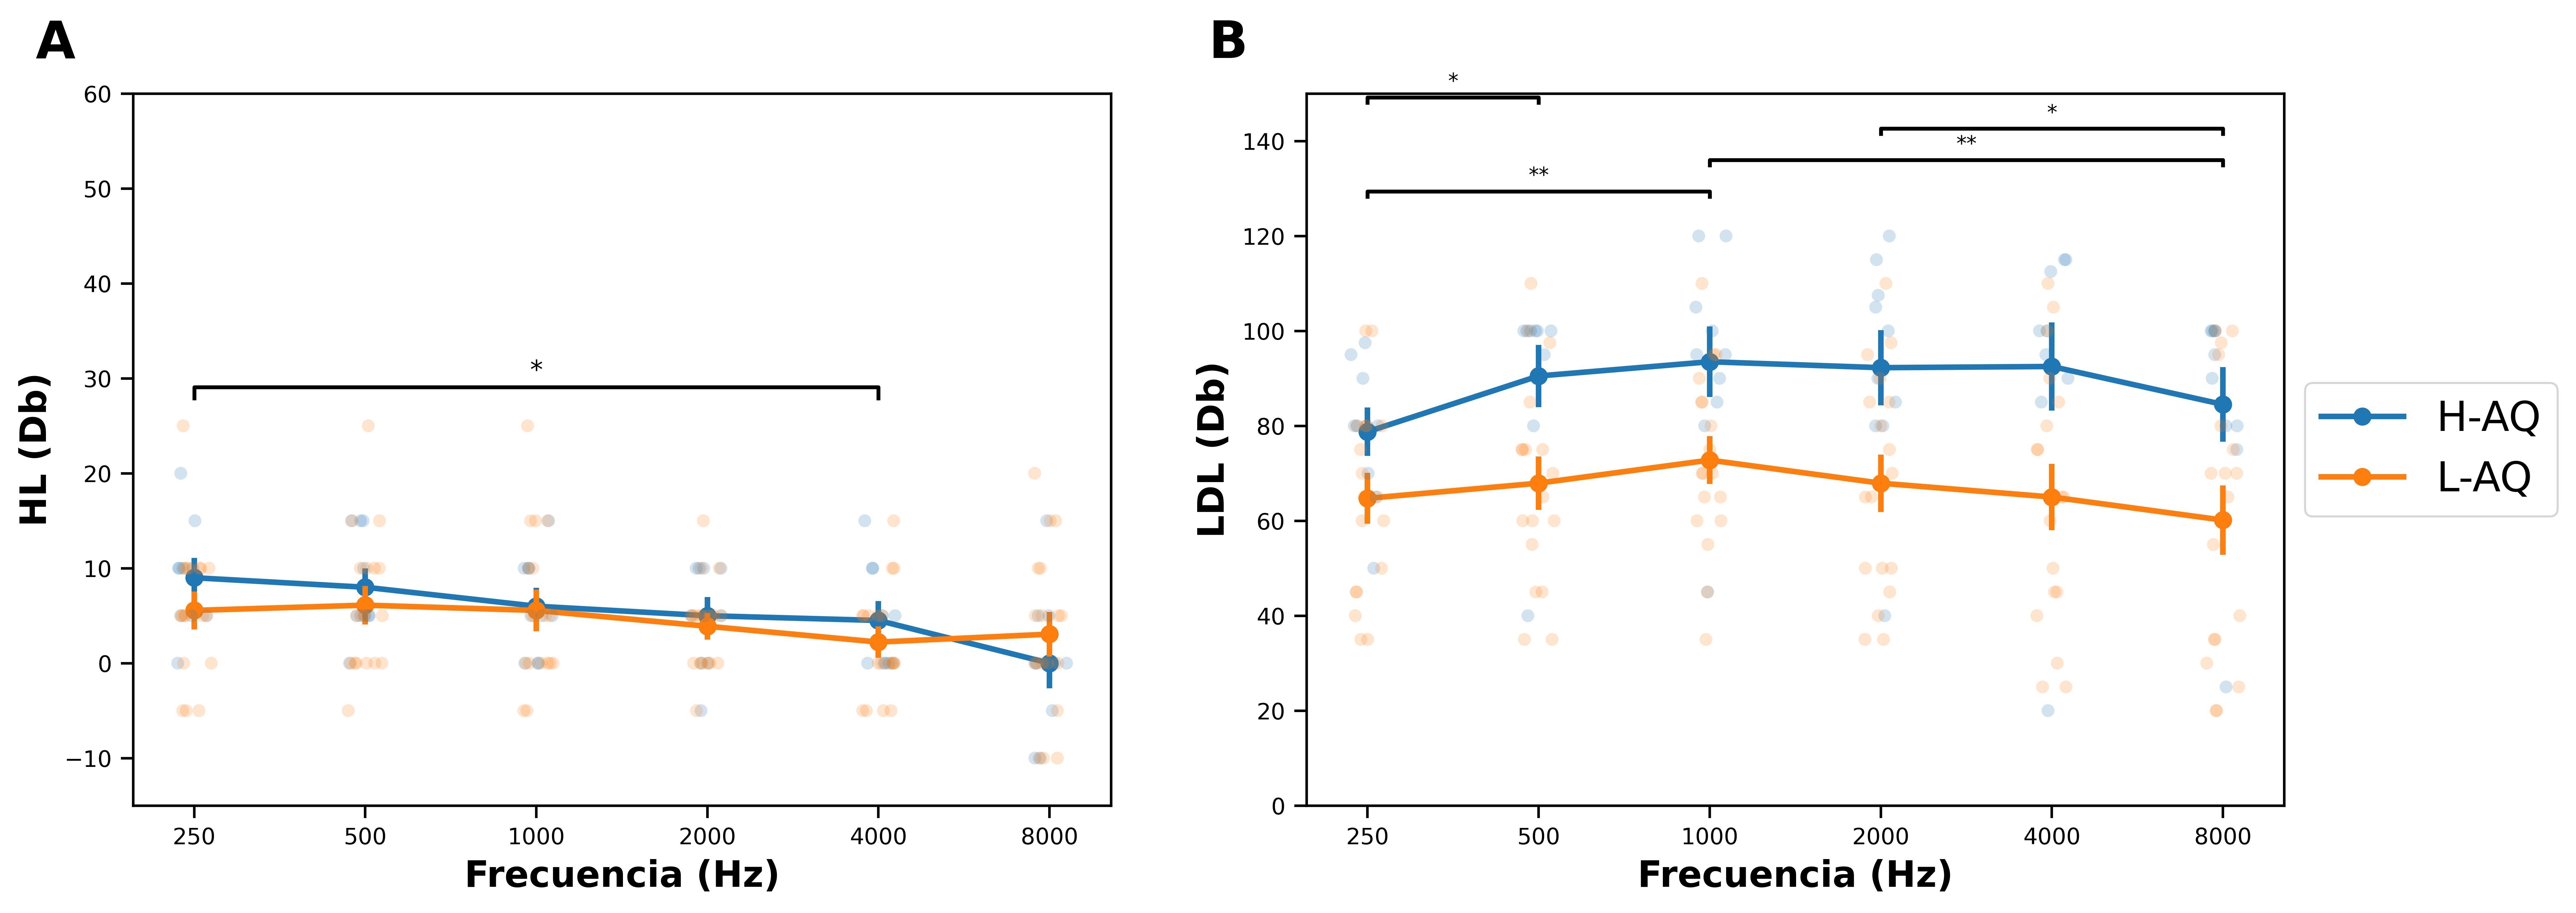

In [58]:
import matplotlib.pyplot as plt
import string
from matplotlib import rc

sns.set_context("paper")

rc("text", usetex=False)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=600)
freq_range = [250, 500, 1000, 2000, 4000, 8000]

ax1 = plt.subplot(121)

ax1 = sns.stripplot(
    data=df_pointplots_hl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=False,
    legend=False,
    alpha=0.20,
)

ax1 = sns.pointplot(
    data=df_pointplots_hl,
    x="Freq",
    y="Db",
    hue="Group",
    errorbar="se",
    legend=False,
    dodge=False,
)

# Draw stars
hl_pvalues = hl_posthoc[["Contrast", "Freq", "A", "B", "p-corr"]]
hl_pvalues_freq = hl_pvalues.query("Freq == '-' & Contrast == 'Freq'").drop(
    columns=["Freq", "Contrast"]
)
annotations = hl_pvalues_freq.to_dict(orient="split", index=False)["data"]
starbars.draw_annotation(annotations, ns_show=False, ax=ax1)

ax1.set_xticklabels(freq_range)
# ax1.set_ylabel(
#    "Hearing Level (Db)", fontdict={"weight": "bold", "size": 14}
# )
# ax1.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold", "size": 14})

ax1.set_ylabel("HL (Db)", fontdict={"weight": "bold", "size": 14})
ax1.set_xlabel("Frecuencia (Hz)", fontdict={"weight": "bold", "size": 14})

ax1.text(
    -0.1,
    1.05,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)
ax1.set_ylim(-15, 60)
# ax1.invert_yaxis()

ax2 = plt.subplot(122)

ax2 = sns.stripplot(
    data=df_pointplots_ldl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=False,
    alpha=0.20,
)

ax2 = sns.pointplot(
    data=df_pointplots_ldl,
    x="Freq",
    y="Db",
    hue="Group",
    dodge=False,
    errorbar="se",
)

# Draw stars
ldl_pvalues = ldl_posthoc[["Contrast", "Freq", "A", "B", "p-corr"]]
ldl_pvalues_freq = ldl_pvalues.query("Freq == '-' & Contrast == 'Freq'").drop(
    columns=["Freq", "Contrast"]
)
annotations = ldl_pvalues_freq.to_dict(orient="split", index=False)["data"]
starbars.draw_annotation(
    annotations, ns_show=False, ax=ax2, fontsize=8, tip_length=0.01
)

ax2.set_xticklabels(freq_range)
# ax2.set_ylabel(
#    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold", "size": 14}
# )
# ax2.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold", "size": 14})

ax2.set_ylabel("LDL (Db)", fontdict={"weight": "bold", "size": 14})
ax2.set_xlabel("Frecuencia (Hz)", fontdict={"weight": "bold", "size": 14})

ax2.text(
    -0.1,
    1.05,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

ax2.set_ylim(0, 150)
# ax2.invert_yaxis()

# Remove legend title
handles, labels = ax2.get_legend_handles_labels()
leg = ax2.legend(
    fontsize=16,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    handles=handles[2:],
    labels=labels[2:],
)

fig.savefig("drafts/FIG2.pdf", bbox_inches="tight", format="pdf")

## DFI Plot

### Preprocessing

In [42]:
df_sigmoid_fitted = pd.read_pickle("data/df_group_sigmoid_aq")

soas = [
    34.0,
    51.0,
    68.0,
    85.0,
    102.0,
    119.0,
    136.0,
    153.0,
    170.0,
    187.0,
    204.0,
    221.0,
    238.0,
    255.0,
    272.0,
]  # inter beep delay in experiment

In [43]:
df_sigmoid_fitted

,AQ_MC,a,b,TWI,slope,illusion_count
0,False,15.652368,47.333169,145.875356,-19.290868,57.0
1,True,8.367526,28.970752,149.597827,-16.231124,33.7


In [44]:
# Generate the data for the plotsusing the fitted parameters
x = np.linspace(soas[0], soas[-1], 100)

index_of_control_group = 0
control = df_sigmoid_fitted.iloc[index_of_control_group].tolist()[1:-1]

index_of_HA_group = 1
ha = df_sigmoid_fitted.iloc[index_of_HA_group].tolist()[1:-1]

y_control = sig(x, *control)
y_ha = sig(x, *ha)

# Create a pandas DataFrame
df_control = pd.DataFrame({"x": x, "y": y_control})
df_ha = pd.DataFrame({"x": x, "y": y_ha})

### Plot

In [45]:
asd_data = (
    df_sigmoid.query("AQ_MC == 1").groupby("SOA")["Illusion_count"].mean().values * 10
)
asd_data_sem = (
    df_sigmoid.query("AQ_MC == 1").groupby("SOA")["Illusion_count"].sem().values * 10
)

td_data = (
    df_sigmoid.query("AQ_MC == 0").groupby("SOA")["Illusion_count"].mean().values * 10
)
td_data_sem = (
    df_sigmoid.query("AQ_MC == 0").groupby("SOA")["Illusion_count"].sem().values * 10
)

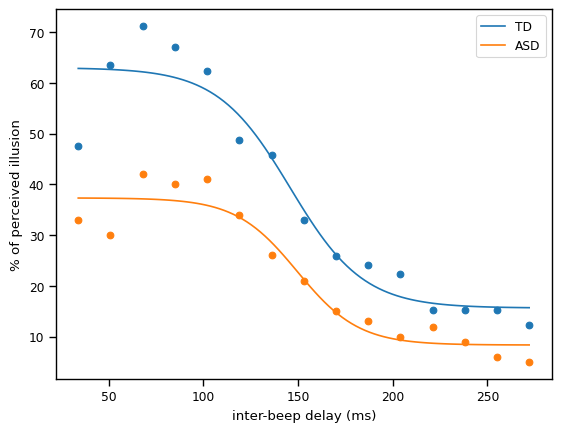

In [46]:
# Plot the sigmoid function
fig = sns.lineplot(data=df_control, x="x", y="y", label="TD")
fig = plt.scatter(soas, td_data)
# fig = plt.errorbar(soas, td_data, td_data_sem, fmt="none")

fig = sns.lineplot(data=df_ha, x="x", y="y", label="ASD")
fig = plt.scatter(soas, asd_data)
# fig = plt.errorbar(soas, asd_data, asd_data_sem, fmt="none")

plt.xlabel("inter-beep delay (ms)")
plt.ylabel("% of perceived illusion")
plt.legend()
plt.show()

In [47]:
pg.mixed_anova(
    data=df_sigmoid,
    dv="Illusion_count",
    within="SOA",
    between="AQ_MC",
    subject="Participant",
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,AQ_MC,227.879753,1,25,227.879753,3.727082,6.495415e-02,NaN,0.129741,NaN,NaN,NaN,NaN
1,SOA,1249.219753,14,350,89.229982,33.170127,1.039713e-55,1.188901e-17,0.570226,0.290018,False,0.000005,2.738634e-14
2,Interaction,69.388874,14,350,4.956348,1.842460,3.162087e-02,NaN,0.068640,NaN,NaN,NaN,NaN


In [48]:
dfi_posthoc = pg.pairwise_tests(
    data=df_sigmoid,
    dv="Illusion_count",
    between="AQ_MC",
    within="SOA",
    subject="Participant",
    correction=True,
    effsize="cohen",
    padjust="bonferroni",
)

dfi_posthoc

,Contrast,SOA,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,SOA,-,2.0,3.0,True,True,-2.655343,26.000000,two-sided,0.013349,1.000000,bonferroni,3.658,-0.278602
1,SOA,-,2.0,4.0,True,True,-4.248839,26.000000,two-sided,0.000244,0.025589,bonferroni,119.16,-0.558212
2,SOA,-,2.0,5.0,True,True,-3.696786,26.000000,two-sided,0.001026,0.107688,bonferroni,33.31,-0.477622
3,SOA,-,2.0,6.0,True,True,-2.210225,26.000000,two-sided,0.036095,1.000000,bonferroni,1.615,-0.388247
4,SOA,-,2.0,7.0,True,True,-0.204782,26.000000,two-sided,0.839337,1.000000,bonferroni,0.208,-0.034716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,SOA * AQ_MC,12.0,False,True,False,True,1.564415,24.512484,two-sided,0.130540,1.000000,bonferroni,0.884,0.561361
117,SOA * AQ_MC,13.0,False,True,False,True,0.398252,14.363955,two-sided,0.696301,1.000000,bonferroni,0.389,0.173774
118,SOA * AQ_MC,14.0,False,True,False,True,1.086057,19.151600,two-sided,0.290935,1.000000,bonferroni,0.564,0.431731
119,SOA * AQ_MC,15.0,False,True,False,True,1.717335,24.871261,two-sided,0.098347,1.000000,bonferroni,1.052,0.606874


In [49]:
sup_table_1 = dfi_posthoc.query("Contrast == 'SOA * AQ_MC'")[
    ["Contrast", "SOA", "A", "B", "T", "dof", "p-unc", "cohen"]
]
pg.print_table(sup_table_1, tablefmt="latex")


POST HOC TESTS

\begin{tabular}{lrllrrrr}
\hline
 Contrast    &    SOA & A     & B    &     T &    dof &   p-unc &   cohen \\
\hline
 SOA * AQ\_MC &  2.000 & False & True & 1.117 & 15.868 &   0.281 &   0.472 \\
 SOA * AQ\_MC &  3.000 & False & True & 2.772 & 15.715 &   0.014 &   1.174 \\
 SOA * AQ\_MC &  4.000 & False & True & 2.103 & 13.426 &   0.055 &   0.939 \\
 SOA * AQ\_MC &  5.000 & False & True & 2.204 & 14.546 &   0.044 &   0.958 \\
 SOA * AQ\_MC &  6.000 & False & True & 1.549 & 12.928 &   0.146 &   0.701 \\
 SOA * AQ\_MC &  7.000 & False & True & 1.141 & 18.836 &   0.268 &   0.456 \\
 SOA * AQ\_MC &  8.000 & False & True & 1.614 & 22.631 &   0.120 &   0.604 \\
 SOA * AQ\_MC &  9.000 & False & True & 1.038 & 17.337 &   0.314 &   0.426 \\
 SOA * AQ\_MC & 10.000 & False & True & 1.376 & 24.830 &   0.181 &   0.487 \\
 SOA * AQ\_MC & 11.000 & False & True & 1.274 & 21.441 &   0.216 &   0.487 \\
 SOA * AQ\_MC & 12.000 & False & True & 1.564 & 24.512 &   0.131 &   0.561 \\
 SOA * A

In [50]:
dfi_posthoc.loc[dfi_posthoc["p-unc"] < 0.05].query("Contrast == 'SOA'")

,Contrast,SOA,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,SOA,-,2.0,3.0,True,True,-2.655343,26.0,two-sided,0.013349,1.000000,bonferroni,3.658,-0.278602
1,SOA,-,2.0,4.0,True,True,-4.248839,26.0,two-sided,0.000244,0.025589,bonferroni,119.16,-0.558212
2,SOA,-,2.0,5.0,True,True,-3.696786,26.0,two-sided,0.001026,0.107688,bonferroni,33.31,-0.477622
3,SOA,-,2.0,6.0,True,True,-2.210225,26.0,two-sided,0.036095,1.000000,bonferroni,1.615,-0.388247
6,SOA,-,2.0,9.0,True,True,2.382239,26.0,two-sided,0.024809,1.000000,bonferroni,2.19,0.460708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,SOA,-,11.0,14.0,True,True,2.172862,26.0,two-sided,0.039091,1.000000,bonferroni,1.515,0.364675
93,SOA,-,11.0,15.0,True,True,2.991691,26.0,two-sided,0.006005,0.630560,bonferroni,7.187,0.413338
94,SOA,-,11.0,16.0,True,True,3.261722,26.0,two-sided,0.003090,0.324480,bonferroni,12.723,0.549862
97,SOA,-,12.0,15.0,True,True,2.126438,26.0,two-sided,0.043123,1.000000,bonferroni,1.4,0.306217


/tmp/ipykernel_26128/1492041639.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(["L-AQ", "H-AQ"])
/tmp/ipykernel_26128/1492041639.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(["L-AQ", "H-AQ"])


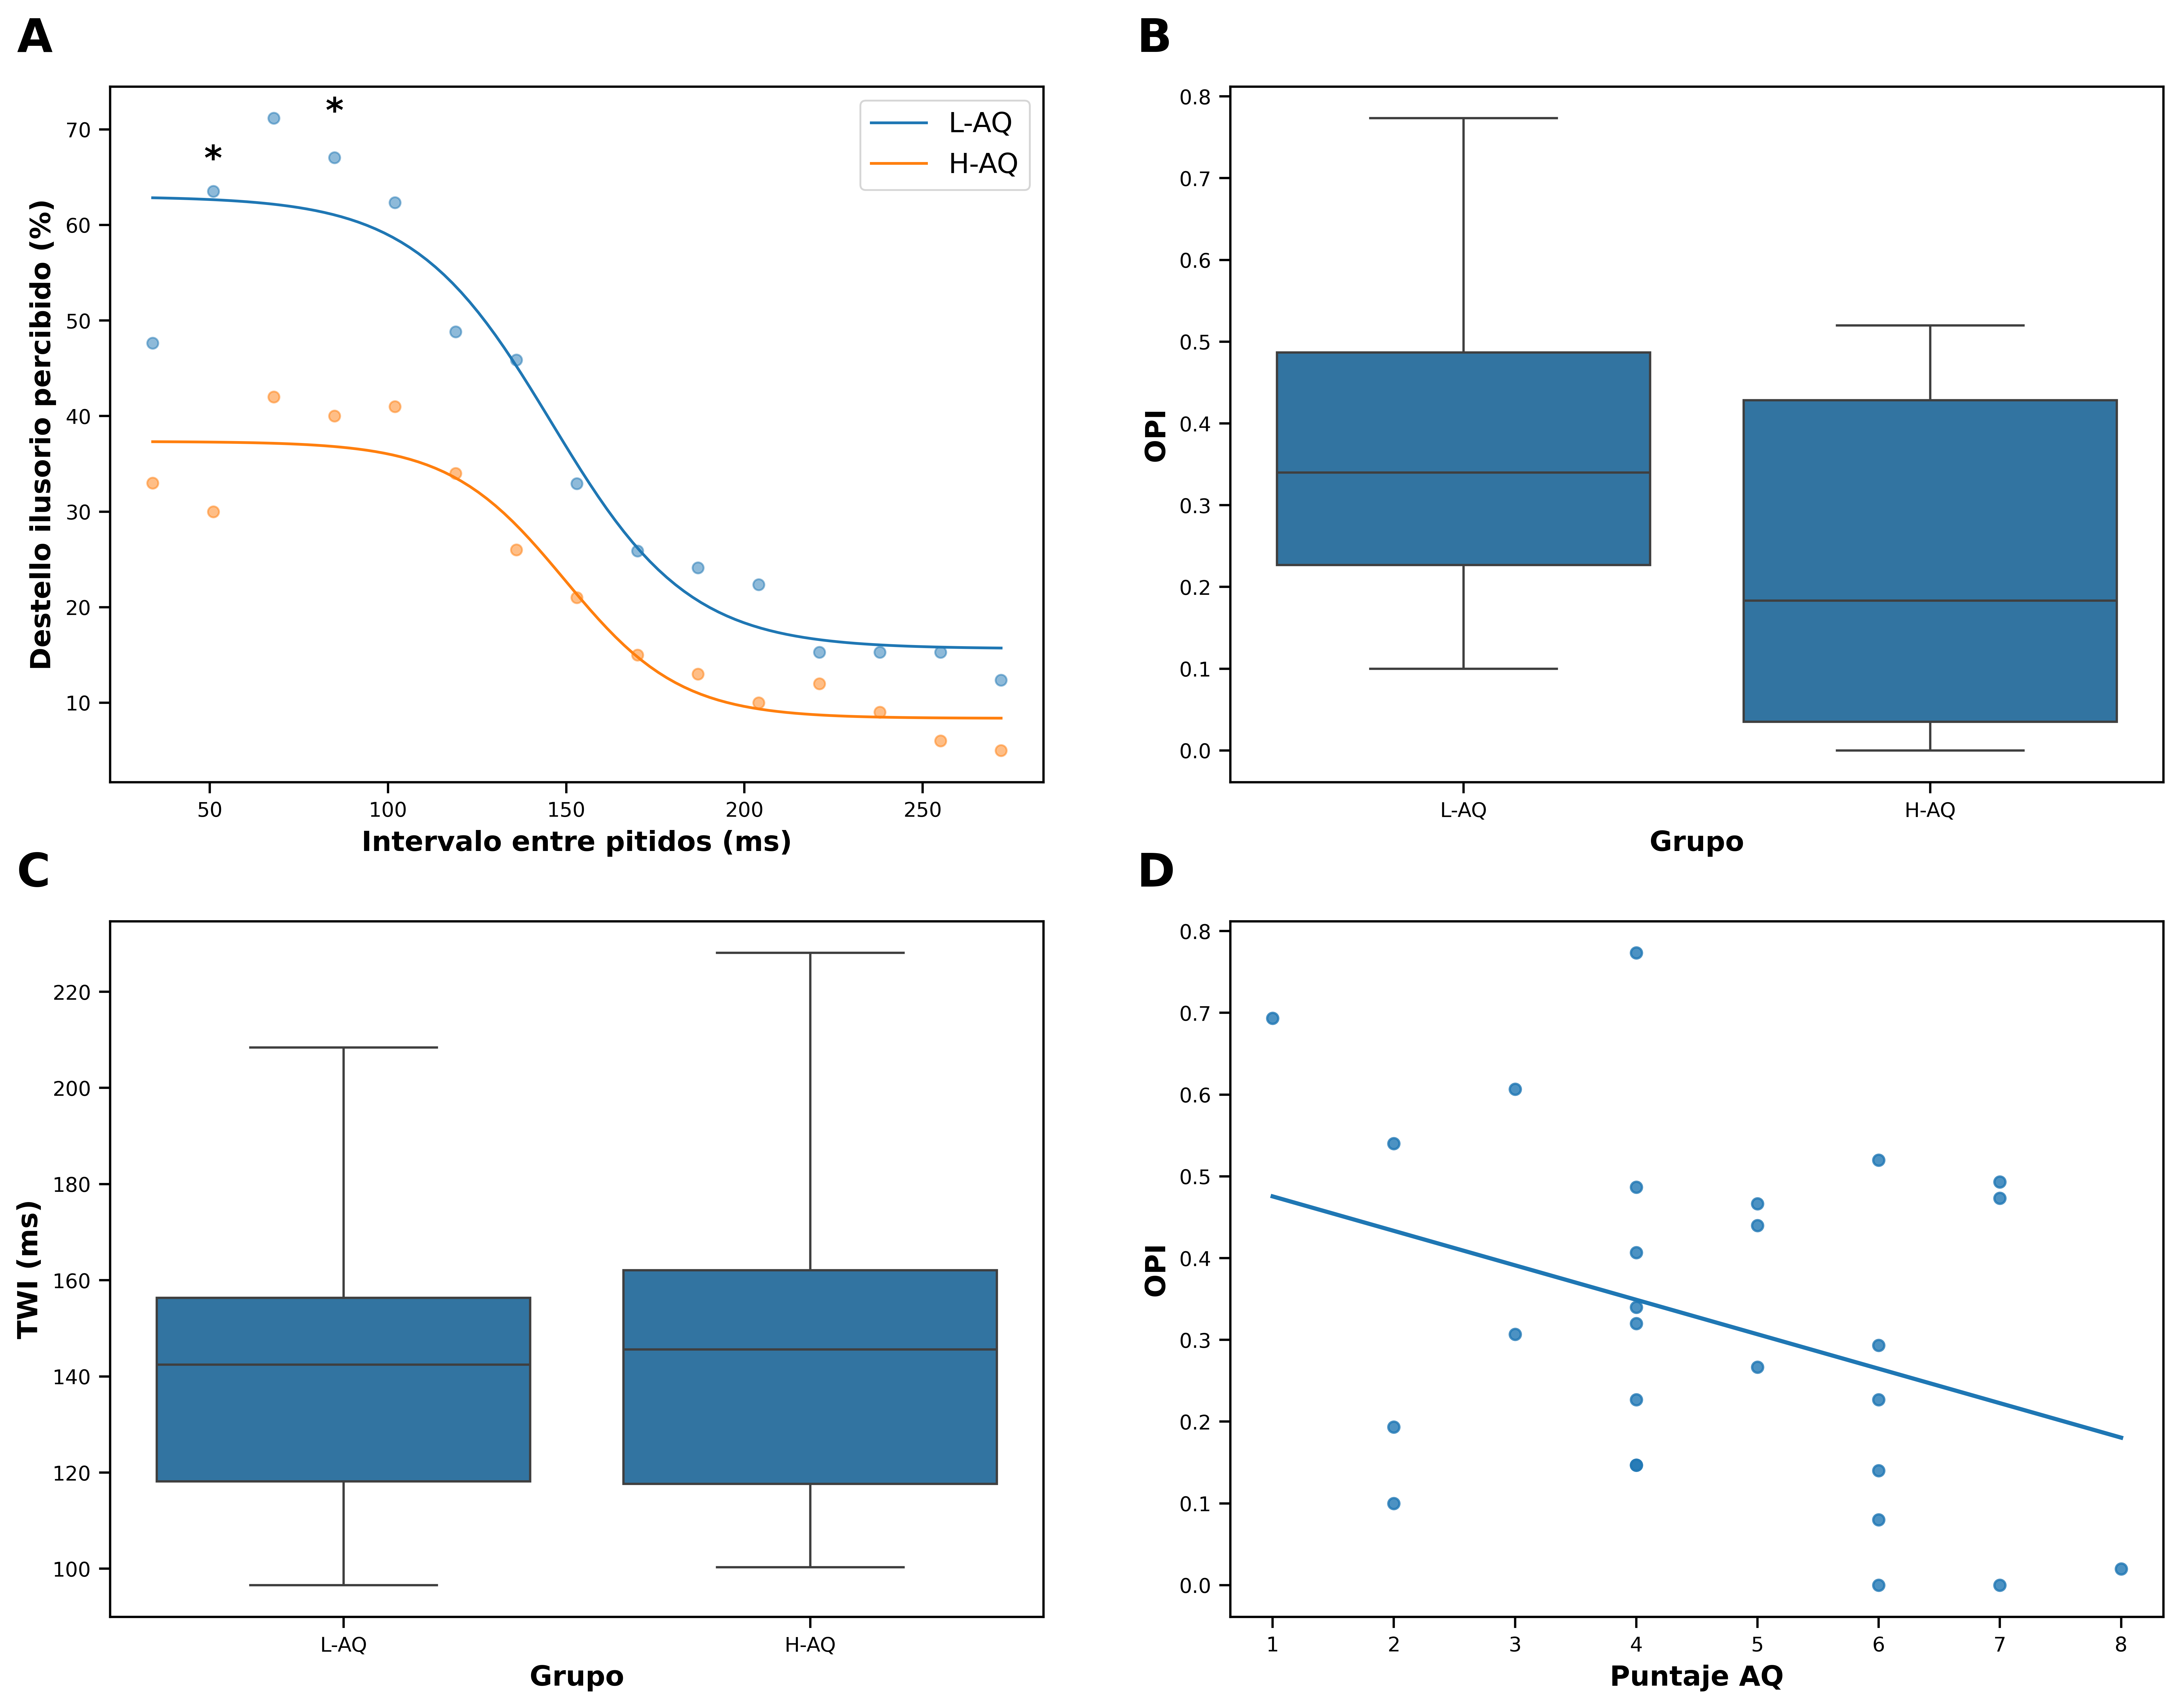

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), dpi=600)

ax1 = plt.subplot(221)
ax1 = sns.lineplot(data=df_control, x="x", y="y", label="L-AQ")
# ax1.set_ylabel(
#    "Perceived second illusory flash (%)", fontdict={"weight": "bold", "size": 12}
# )
# ax1.set_xlabel("Inter-beep delay (ms)", fontdict={"weight": "bold", "size": 12})
#
ax1.set_ylabel(
    "Destello ilusorio percibido (%)", fontdict={"weight": "bold", "size": 12}
)
ax1.set_xlabel("Intervalo entre pitidos (ms)", fontdict={"weight": "bold", "size": 12})

ax1.text(
    -0.1,
    1.05,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)
ax1 = plt.scatter(soas, td_data, alpha=0.5)
ax1 = sns.lineplot(data=df_ha, x="x", y="y", label="H-AQ")
ax1.legend(fontsize=12)
ax1 = plt.scatter(soas, asd_data, alpha=0.5)
ax1 = plt.text(51, 65, "*", ha="center", va="bottom", size=15, weight="bold")
ax1 = plt.text(85, 70, "*", ha="center", va="bottom", size=15, weight="bold")

ax2 = plt.subplot(222)
ax2 = sns.boxplot(data=df, x="AQ_MC", y="OPI")
ax2.set_xticklabels(["L-AQ", "H-AQ"])
# ax2.set_ylabel(
#    "Overall proneness to the illusion", fontdict={"weight": "bold", "size": 12}
# )
# ax2.set_xlabel("Group", fontdict={"weight": "bold", "size": 12})

ax2.set_ylabel("OPI", fontdict={"weight": "bold", "size": 12})
ax2.set_xlabel("Grupo", fontdict={"weight": "bold", "size": 12})

ax2.text(
    -0.1,
    1.05,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

ax3 = plt.subplot(223)
ax3 = sns.boxplot(data=df, x="AQ_MC", y="TWI")
ax3.set_xticklabels(["L-AQ", "H-AQ"])
ax3.set_ylabel("TWI (ms)", fontdict={"weight": "bold", "size": 12})
# ax3.set_xlabel("Group", fontdict={"weight": "bold", "size": 12})
ax3.set_xlabel("Grupo", fontdict={"weight": "bold", "size": 12})
ax3.text(
    -0.1,
    1.05,
    string.ascii_uppercase[2],
    transform=ax3.transAxes,
    size=20,
    weight="bold",
)

ax4 = plt.subplot(224)
ax4 = sns.regplot(data=df, x="AQ_TOTAL", y="OPI", ci=None)
# ax4.set_ylabel(
#    "Overall proneness to the illusion", fontdict={"weight": "bold", "size": 12}
# )
# ax4.set_xlabel("AQ Score", fontdict={"weight": "bold", "size": 12})

ax4.set_ylabel("OPI", fontdict={"weight": "bold", "size": 12})
ax4.set_xlabel("Puntaje AQ", fontdict={"weight": "bold", "size": 12})

ax4.text(
    -0.1,
    1.05,
    string.ascii_uppercase[3],
    transform=ax4.transAxes,
    size=20,
    weight="bold",
)

fig.savefig("drafts/FIG3.pdf", bbox_inches="tight", format="pdf")

## EXTRA
### Correlations between audiometry measurements and double flash illusion
- Average LDL across frequenciess x TWI (plot and correlation)
- Average LDL across frequenciess x OPI (plot and correlation)
- Average HL across frequenciess x TWI (plot and correlation)
- Average HL across frequencies x OPI (plot and correlation)

In [52]:
pg.pairwise_corr(
    data=df, columns=[["TWI", "OPI"], ["Avg_LDL", "Avg_HL"]], method="pearson"
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,TWI,Avg_LDL,pearson,two-sided,23,-0.037221,"[-0.44, 0.38]",0.866103,0.262,0.052648
1,TWI,Avg_HL,pearson,two-sided,23,0.045134,"[-0.37, 0.45]",0.837974,0.264,0.054208
2,OPI,Avg_LDL,pearson,two-sided,25,-0.246439,"[-0.58, 0.16]",0.235016,0.484,0.224119
3,OPI,Avg_HL,pearson,two-sided,25,0.038794,"[-0.36, 0.43]",0.853930,0.252,0.053329


In [53]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["TWI", "OPI"],
        ["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
    ],
    method="pearson",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,TWI,HL_250,pearson,two-sided,23,0.171779,"[-0.26, 0.55]",0.433195,0.345,0.123453
1,TWI,HL_500,pearson,two-sided,23,0.237852,"[-0.19, 0.59]",0.274453,0.454,0.196793
2,TWI,HL_1000,pearson,two-sided,23,0.202923,"[-0.23, 0.57]",0.353083,0.388,0.154580
3,TWI,HL_2000,pearson,two-sided,23,-0.183029,"[-0.55, 0.25]",0.403200,0.359,0.134003
4,TWI,HL_4000,pearson,two-sided,23,-0.068007,"[-0.47, 0.35]",0.757839,0.27,0.060446
5,TWI,HL_8000,pearson,two-sided,23,-0.147602,"[-0.53, 0.28]",0.501523,0.32,0.103362
6,OPI,HL_250,pearson,two-sided,25,0.025453,"[-0.37, 0.42]",0.903873,0.25,0.051084
7,OPI,HL_500,pearson,two-sided,25,0.019102,"[-0.38, 0.41]",0.927790,0.249,0.050345
8,OPI,HL_1000,pearson,two-sided,25,0.117138,"[-0.29, 0.49]",0.577098,0.288,0.086217
9,OPI,HL_2000,pearson,two-sided,25,-0.274092,"[-0.6, 0.14]",0.184888,0.571,0.268400


In [54]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["TWI", "OPI"],
        ["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
    ],
    method="pearson",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,TWI,LDL_250,pearson,two-sided,23,-0.150174,"[-0.53, 0.28]",0.494012,0.322,0.105335
1,TWI,LDL_500,pearson,two-sided,23,-0.151522,"[-0.53, 0.28]",0.490100,0.324,0.106384
2,TWI,LDL_1000,pearson,two-sided,23,0.076453,"[-0.35, 0.47]",0.728804,0.274,0.063409
3,TWI,LDL_2000,pearson,two-sided,23,0.014339,"[-0.4, 0.42]",0.948226,0.259,0.049834
4,TWI,LDL_4000,pearson,two-sided,23,0.006252,"[-0.41, 0.42]",0.977412,0.259,0.049438
5,TWI,LDL_8000,pearson,two-sided,23,-0.043353,"[-0.45, 0.38]",0.844288,0.263,0.053830
6,OPI,LDL_250,pearson,two-sided,25,-0.316694,"[-0.63, 0.09]",0.122972,0.766,0.346283
7,OPI,LDL_500,pearson,two-sided,25,-0.257756,"[-0.59, 0.15]",0.213519,0.517,0.241615
8,OPI,LDL_1000,pearson,two-sided,25,-0.149952,"[-0.51, 0.26]",0.474338,0.316,0.110735
9,OPI,LDL_2000,pearson,two-sided,25,-0.187108,"[-0.54, 0.22]",0.370472,0.363,0.146882


,n,r,CI95%,p-val,BF10,power
pearson,23,-0.037221,"[-0.44, 0.38]",0.866103,0.262,0.052648


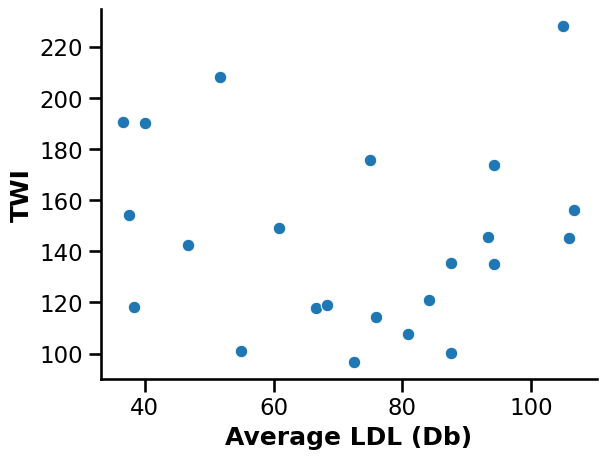

In [55]:
x = "Avg_LDL"
y = "TWI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("TWI", fontdict={"weight": "bold"})
plt.show()

,n,r,CI95%,p-val,BF10,power
pearson,25,-0.246439,"[-0.58, 0.16]",0.235016,0.484,0.224119


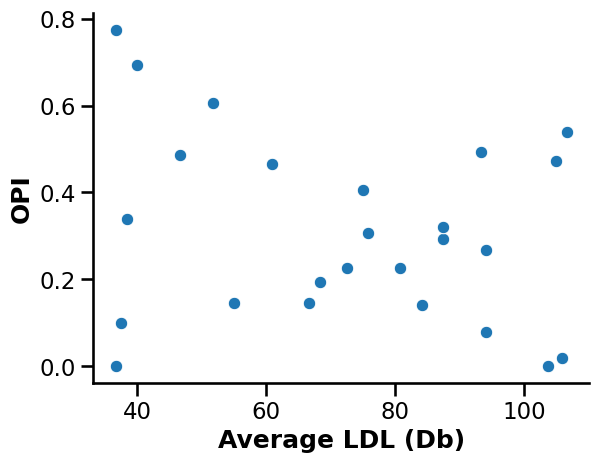

In [56]:
x = "Avg_LDL"
y = "OPI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
plt.show()